# 波士顿房价预测案例——线性回归分析

在这个案例中，我们将利用波士顿郊区的房屋信息数据训练和测试一个模型，并对模型的性能和预测能力进行测试。

## 1、导入必要的工具包

In [21]:
import numpy as np  # 矩阵操作
import pandas as pd # SQL数据处理

from sklearn.metrics import r2_score  #评价回归预测模型的性能

import matplotlib.pyplot as plt   #画图
import seaborn as sns

# 图形出现在Notebook里而不是新窗口
%matplotlib inline

## 2. 读取数据
做完特征工程后的数据，请先运行2_FE_BostonHousePrice.ipynb，得到文件FE_boston_housing.csv

In [22]:
# path to where the data lies
#dpath = './data/'
df = pd.read_csv("FE_boston_housing.csv")

#通过观察前5行，了解数据每列（特征）的概况
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,TAX,PTRATIO,...,RAD_2,RAD_3,RAD_4,RAD_5,RAD_6,RAD_7,RAD_8,RAD_24,MEDV,log_MEDV
0,0.000000,0.18,0.067815,0.0,0.314815,0.577505,0.641607,0.269203,0.208015,0.3,...,0,0,0,0,0,0,0,0,0.422222,0.666856
1,0.000236,0.00,0.242302,0.0,0.172840,0.547998,0.782698,0.348962,0.104962,0.5,...,1,0,0,0,0,0,0,0,0.368889,0.619696
2,0.000236,0.00,0.242302,0.0,0.172840,0.694386,0.599382,0.348962,0.104962,0.5,...,1,0,0,0,0,0,0,0,0.660000,0.833335
3,0.000293,0.00,0.063050,0.0,0.150206,0.658555,0.441813,0.448545,0.066794,0.6,...,0,1,0,0,0,0,0,0,0.631111,0.816001
4,0.000705,0.00,0.063050,0.0,0.150206,0.687105,0.528321,0.448545,0.066794,0.6,...,0,1,0,0,0,0,0,0,0.693333,0.852567


###  数据基本信息
样本数目、特征维数
每个特征的类型、空值样本的数目、数据类型

In [23]:
#df.info()

### 数据准备

In [24]:
# 从原始数据中分离输入特征x和输出y
y = df["MEDV"]

X = df.drop(["MEDV", "log_MEDV"], axis = 1)

#特征名称，用于后续显示权重系数对应的特征
feat_names = X.columns

当数据量比较大时，可用train_test_split从训练集中分出一部分做校验集；
样本数目较少时，建议用交叉验证。
在线性回归中，留一交叉验证有简便计算方式。

下面将训练数据分割成训练集和测试集，只是让大家对模型的训练误差、校验集上的测试误差估计、和测试集上的测试误差做个比较。

In [25]:
#将数据分割训练数据与测试数据
from sklearn.model_selection import train_test_split

# 随机采样20%的数据构建测试样本，其余作为训练样本
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=33, test_size=0.2)
X_train.shape

(404, 21)

## 3、确定模型类型

### 3.1 尝试缺省参数的线性回归

In [26]:
# 线性回归
#class sklearn.linear_model.LinearRegression(fit_intercept=True, normalize=False, copy_X=True, n_jobs=1)
from sklearn.linear_model import LinearRegression

# 1.使用默认配置初始化学习器实例
lr = LinearRegression()

# 2.用训练数据训练模型参数
lr.fit(X_train, y_train)

# 3. 用训练好的模型对测试集进行预测
y_test_pred_lr = lr.predict(X_test)
y_train_pred_lr = lr.predict(X_train)


# 看看各特征的权重系数，系数的绝对值大小可视为该特征的重要性
fs = pd.DataFrame({"columns":list(feat_names), "coef":list((lr.coef_.T))})
fs.sort_values(by=['coef'],ascending=False)

,coef,columns
5,0.452377,RM
1,0.129239,ZN
20,0.103221,RAD_24
10,0.078899,B
3,0.059660,CHAS
18,0.037664,RAD_7
19,0.030071,RAD_8
14,0.027465,RAD_3
2,0.013818,INDUS
6,-0.001228,AGE


#### 3.1.1 模型评价

In [27]:
# 使用r2_score评价模型在测试集和训练集上的性能，并输出评估结果
#测试集
print 'The r2 score of LinearRegression on test is', r2_score(y_test, y_test_pred_lr)
#训练集
print 'The r2 score of LinearRegression on train is', r2_score(y_train, y_train_pred_lr)

The r2 score of LinearRegression on test is 0.693978981051
The r2 score of LinearRegression on train is 0.754914643687


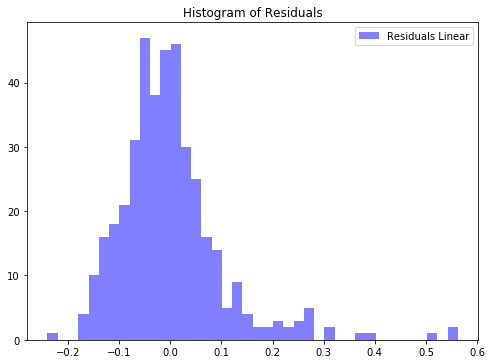

In [28]:
#在训练集上观察预测残差的分布，看是否符合模型假设：噪声为0均值的高斯噪声
f, ax = plt.subplots(figsize=(7, 5)) 
f.tight_layout() 
ax.hist(y_train - y_train_pred_lr, bins=40, label='Residuals Linear', color='b', alpha=.5); 
ax.set_title("Histogram of Residuals") 
ax.legend(loc='best');

残差分布和高斯分布比较匹配，但还是大值这边的尾巴更长

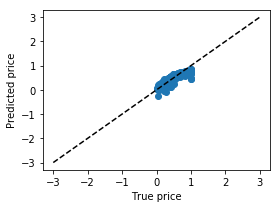

In [29]:
#还可以观察预测值与真值的散点图
plt.figure(figsize=(4, 3))
plt.scatter(y_train, y_train_pred_lr)
plt.plot([-3, 3], [-3, 3], '--k')   #数据已经标准化，3倍标准差即可
plt.axis('tight')
plt.xlabel('True price')
plt.ylabel('Predicted price')
plt.tight_layout()

在y的真值大的部分预测效果不好

### 3.2 正则化的线性回归（L2正则 --> 岭回归）

In [30]:
#岭回归／L2正则
#class sklearn.linear_model.RidgeCV(alphas=(0.1, 1.0, 10.0), fit_intercept=True, 
#                                  normalize=False, scoring=None, cv=None, gcv_mode=None, 
#                                  store_cv_values=False)
from sklearn.linear_model import  RidgeCV

#1. 设置超参数（正则参数）范围
alphas = [ 0.01, 0.1, 1, 10,100]
#n_alphas = 20
#alphas = np.logspace(-5,2,n_alphas)

#2. 生成一个RidgeCV实例
ridge = RidgeCV(alphas=alphas, store_cv_values=True)  

#3. 模型训练
ridge.fit(X_train, y_train)    

#4. 预测
y_test_pred_ridge = ridge.predict(X_test)
y_train_pred_ridge = ridge.predict(X_train)


# 评估，使用r2_score评价模型在测试集和训练集上的性能
print 'The r2 score of RidgeCV on test is', r2_score(y_test, y_test_pred_ridge)
print 'The r2 score of RidgeCV on train is', r2_score(y_train, y_train_pred_ridge)

The r2 score of RidgeCV on test is 0.696168481307
The r2 score of RidgeCV on train is 0.754852444045


### 可视化

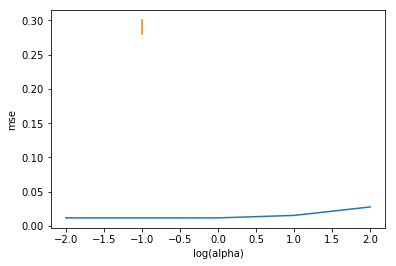

('alpha is:', 0.10000000000000001)


In [31]:
mse_mean = np.mean(ridge.cv_values_, axis = 0)
plt.plot(np.log10(alphas), mse_mean.reshape(len(alphas),1)) 

#这是为了标出最佳参数的位置，不是必须
plt.plot(np.log10(ridge.alpha_)*np.ones(3), [0.28, 0.29, 0.30])

plt.xlabel('log(alpha)')
plt.ylabel('mse')
plt.show()

print ('alpha is:', ridge.alpha_)

In [32]:
# 看看各特征的权重系数，系数的绝对值大小可视为该特征的重要性
fs = pd.DataFrame({"columns":list(feat_names), "coef_lr":list((lr.coef_.T)), "coef_ridge":list((ridge.coef_.T))})
fs.sort_values(by=['coef_lr'],ascending=False)

,coef_lr,coef_ridge,columns
5,0.452377,0.449104,RM
1,0.129239,0.125966,ZN
20,0.103221,0.099911,RAD_24
10,0.078899,0.079327,B
3,0.059660,0.060075,CHAS
18,0.037664,0.036712,RAD_7
19,0.030071,0.030423,RAD_8
14,0.027465,0.028356,RAD_3
2,0.013818,0.011491,INDUS
6,-0.001228,-0.001077,AGE


### 3.3 正则化的线性回归（L1正则 --> Lasso）

In [33]:
#### Lasso／L1正则
# class sklearn.linear_model.LassoCV(eps=0.001, n_alphas=100, alphas=None, fit_intercept=True, 
#                                    normalize=False, precompute=’auto’, max_iter=1000, 
#                                    tol=0.0001, copy_X=True, cv=None, verbose=False, n_jobs=1,
#                                    positive=False, random_state=None, selection=’cyclic’)
from sklearn.linear_model import LassoCV

#1. 设置超参数搜索范围
#alphas = [ 0.01, 0.1, 1, 10,100]

#2. 生成学习器实例
#lasso = LassoCV(alphas=alphas)

#1. 设置超参数搜索范围
#Lasso可以自动确定最大的alpha，所以另一种设置alpha的方式是设置最小的alpha值（eps） 和 超参数的数目（n_alphas），
#然后LassoCV对最小值和最大值之间在log域上均匀取值n_alphas个
# np.logspace(np.log10(alpha_max * eps), np.log10(alpha_max),num=n_alphas)[::-1]

#2 生成LassoCV实例（默认超参数搜索范围）
lasso = LassoCV()  

#3. 训练（内含CV）
lasso.fit(X_train, y_train)  

#4. 测试
y_test_pred_lasso = lasso.predict(X_test)
y_train_pred_lasso = lasso.predict(X_train)


# 评估，使用r2_score评价模型在测试集和训练集上的性能
print 'The r2 score of LassoCV on test is', r2_score(y_test, y_test_pred_lasso)
print 'The r2 score of LassoCV on train is', r2_score(y_train, y_train_pred_lasso)

The r2 score of LassoCV on test is 0.694509937168
The r2 score of LassoCV on train is 0.754886151123


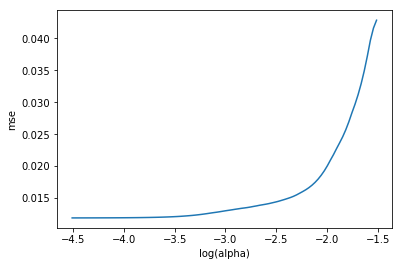

('alpha is:', 3.0853701706818212e-05)


In [34]:
mses = np.mean(lasso.mse_path_, axis = 1)
plt.plot(np.log10(lasso.alphas_), mses) 
#plt.plot(np.log10(lasso.alphas_)*np.ones(3), [0.3, 0.4, 1.0])
plt.xlabel('log(alpha)')
plt.ylabel('mse')
plt.show()    
            
print ('alpha is:', lasso.alpha_)

In [35]:
# 看看各特征的权重系数，系数的绝对值大小可视为该特征的重要性
fs = pd.DataFrame({"columns":list(feat_names), "coef_lr":list((lr.coef_.T)), "coef_ridge":list((ridge.coef_.T)), "coef_lasso":list((lasso.coef_.T))})
fs.sort_values(by=['coef_lr'],ascending=False)

,coef_lasso,coef_lr,coef_ridge,columns
5,0.452220,0.452377,0.449104,RM
1,0.126455,0.129239,0.125966,ZN
20,0.107770,0.103221,0.099911,RAD_24
10,0.078393,0.078899,0.079327,B
3,0.059860,0.059660,0.060075,CHAS
18,0.044859,0.037664,0.036712,RAD_7
19,0.037731,0.030071,0.030423,RAD_8
14,0.036252,0.027465,0.028356,RAD_3
2,0.009386,0.013818,0.011491,INDUS
6,-0.000539,-0.001228,-0.001077,AGE


5. 代码中给出了岭回归（RidgeCV）和Lasso（LassoCV）超参数（alpha_）调优的过程，请结合两个最佳模型以及最小二乘线性回归模型的结果，给出什么场合应该用岭回归，什么场合用Lasso，什么场合用最小二乘。
答：最小二乘对异常值极其敏感，添加正则项的岭回归则影响较小；另外特征完全共线性或者相关度较高，也适合使用岭回归。
如果输入特征的维度很高,而且是稀疏线性关系的话， 岭回归就不太合适,考虑使用Lasso回归。
L1正则化(Lasso回归)可以使得一些特征的系数变小,甚至还使一些绝对值较小的系数直接变为0，从而增强模型的泛化能力  。对于高纬的特征数据,尤其是线性关系是稀疏的，就采用L1正则化(Lasso回归),或者是要在一堆特征里面找出主要的特征，那么L1正则化(Lasso回归)更是首选了。


### 3.3　弹性网络： L2损失＋（L1正则+L2正则）：ElasticNet

In [49]:
from sklearn.linear_model import ElasticNet

# 设定超参数范围
alphas = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000]

# 初始化，L1/L2正则各半
en =ElasticNet(alpha=0.1, l1_ratio=1)

# 训练
en.fit(X_train, y_train)

# 预测
y_train_pred_en = en.predict(X_train)
y_test_pred_en = en.predict(X_test)

# 性能评估，r2
print('the r2_score on train:', r2_score(y_train, y_train_pred_en))
print('the r2_score on test:', r2_score(y_test, y_test_pred_en))


('the r2_score on train:', 0.0)
('the r2_score on test:', -0.031660985575687528)


In [43]:
print en.coef_

[-0.  0. -0.  0. -0.  0. -0.  0. -0. -0.  0. -0. -0.  0.  0. -0.  0. -0.
  0.  0. -0.]
